## Algorithms From Scratch
# Algorithms From Scratch: Support Vector Machines 
## Detailing and Building a Support Vector Machine from Scratch

A popular algorithm that is capable of performing linear or non-linear classification and regression, Support Vector Machines were the talk of the town before the rise of deep learning due to the exciting kernel trick - If the terminology makes no sense to you right now don't worry about it. By the end of this post you'll have an good understanding about the intuition of SVMs,  what is happening under the hood of linear SVMs, and how to implement one in Python. 

To see the full Algorithms from Scratch Series click on the Link below. 

[Algorithms From Scratch](https://towardsdatascience.com/tagged/algorithms-from-scratch)


## Intuition 

In classification problems the objective of the SVM is to fit the largest possible margin between the 2 classes. On the contrary, regression task flips the objective of classification task and attempts to fit as many instances as possible within the margin - We will first focus on classification. 

If we focus solely on the extremes of the data (the observations that are on the edges of the cluster) and we define a threshold to be the mid-point between the two extremes, we are left with a margin that we use to sepereate the two classes - this is often referred to as a hyperplane. When we apply a threshold that gives us the largest margin (meaning that we are strict to ensure that no instances land within the margin) to make classifications this is called **Hard Margin Classification** (some text refer to this as *Maximal Margin Classification*). 

When detailing hard margin classification it always helps to see what is happening visually, hence *Figure 2* is an example of a hard margin classification. To do this we will use the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from scikit-learn. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
%matplotlib inline

In [31]:
def plot_svm():
    # https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    # getting the decision function
    plt.figure(figsize=(10, 5))
    decision_function = svc.decision_function(X)
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    # plot observations
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # creating the grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot decision boundaries and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # plot support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    plt.title("Linear SVM (Hard Margin Classification)")
    plt.tight_layout()
    plt.show()

In [32]:
# https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/svm_tests.py
def visualize_svm():
    """
    Visualize the svm
    """
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title("My implementation of Linear SVM (Hard Margin Classification)")
    plt.tight_layout()

    plt.show()

In [4]:
# store the data 
iris = load_iris()

# convert to DataFrame
df = pd.DataFrame(data=iris.data,
                  columns= iris.feature_names)

# store mapping of targets and target names
target_dict = dict(zip(set(iris.target), iris.target_names))

# add the target labels and the feature names
df["target"] = iris.target
df["target_names"] = df.target.map(target_dict)

# view the data
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


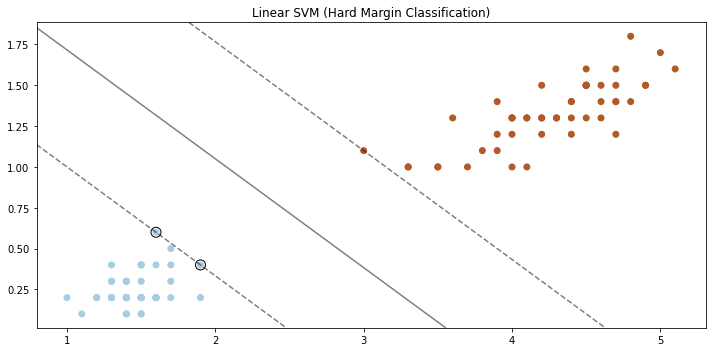

In [5]:
# setting X and y  
X = df.query("target_names == 'setosa' or target_names == 'versicolor'").loc[:, "petal length (cm)":"petal width (cm)"] 
y = df.query("target_names == 'setosa' or target_names == 'versicolor'").loc[:, "target"] 

# fit the model with hard margin (Large C parameter)
svc = LinearSVC(loss="hinge", C=1000)
svc.fit(X, y)

plot_svm()

*Figure 2* displays how the Linear SVM uses hard margin classification to ensure that no instances falls within the margin. Although this looks good for our current scenario, we must be careful to take into account the pitfalls that come with performing hard margin classification: 
1. Very sensitive to outliers 
2. It only works when the data is linearly seperable

## Dealing with Non-Linear Data

It's very rare that we get data that is linearly seperable in the real world. Hence, as an alternative to hard margin classification there's soft margin classification which may be a better solution to overcome the pitfalls listed above. When we allow for there to be some misclassifications (meaning that some negative observations may be classified as postive and vice versa), the distance from the threshold to the observations is called *soft margin*. In soft margin classification we aim to achieve a good balance between maximizing the size of the margin and limiting the amount of violations in the margin (the number of observations that land in the margin). 

Another way we can approach problems in which we can not simply distinguish the classes with a straight line is by using the kernel trick. The kernel trick maps non-linearly seperable data into a higher dimension then uses a hyperplane to seperate the classes. What makes this trick so exciting is that the mapping of the data into higher dimensions does not actually add the new features, but we still get the same results as if we did. Since we do not have to add the new features to our data, our model is much more computationally effieicent and works ust as good. 

You'll see an example of this phenomena below. 

### Terminology  
* **Decision Boundary**: The hyperplane that seperates the dataset into two classes
* **Support Vectors**: The observations are at the edge of the cluster (located nearest to the seperating hyperplane).
* **Hard Margin**: When we strictly impose that all observations do not fall within the margin
* **Soft Margin**: When we allow for some misclassification. We seek to find a balacne of keeping the margin as large as possible and limiting the number of violations ([bias/variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff))


In [6]:
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

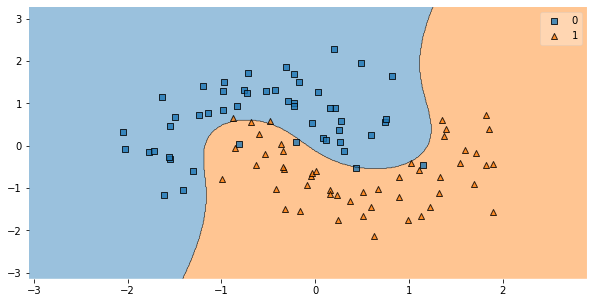

In [7]:
# loading the data
X, y = make_moons(noise=0.3, random_state=0)

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit the model with polynomial kernel
svc_clf = SVC(kernel="poly", degree=3, C=5, coef0=1)
svc_clf.fit(X_scaled, y)

# plotting the decision regions
plt.figure(figsize=(10, 5))
plot_decision_regions(X_scaled, y, clf=svc_clf)

plt.show()

Note: We applied a polynomial kernel to this dataset, however RBF is also a very popular kernel that is applied in many Machine Learning problems and is often used as a default when data is not linearly seperable. 

## Creating the Model

Now that we have built up our conceptual understanding of what SVM is doing, lets understand what is happening under the hood of the model. The linear SVM classifier computes the decision function `w.T * x + b` and predicts the positive class for reults that are positive or else it is the negative class. Training a Linear SVM classifier means finding the values `w` and `b` that make the margin as wide as possible whilst avoiding margin violations (hard margin classification) or limiting the (soft margin classification) 

The slope of the decision function is equal to the norm of the weight vector hence for us to achieve the largest possible margin we want to minimize the norm of the weight vector. However, there are ways to go about this for us to achieve hard margin classification and soft margin classification. 

**Hard Margin** 
INPUT IMAGE OF THE HARD MARGIN OPTIMIZATION PROBLEM 

**Soft Margin** 
INPUT IMAGE OF THE SOFT MARGIN OPTIMIZATION PROBLEM

## Implementation

In [27]:
from sklearn.datasets import make_blobs 

# generating a dataset
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=23)

In [28]:
def initialize_param(X): 
    """
    Initializing the weight vector and bias
    """
    _, n_features = X.shape
    w = np.zeros(n_features)
    b = 0 
    return w, b

In [29]:
def optimization(X, y, learning_rate=0.001, lambd=0.01, n_iters=1000): 
    """
    finding value of w and b that make the margin as large as possible while
    avoiding violations (Hard margin classification)
    """
    t = np.where(y <= 0, -1, 1)
    w, b = initialize_param(X)
    
    for _ in range(n_iters): 
        for idx, x_i in enumerate(X): 
            condition = t[idx] * (np.dot(x_i, w) + b) >= 1
            if condition: 
                w -= learning_rate * (2 * lambd * w)
            else: 
                w -= learning_rate * (2 * lambd *  w - np.dot(x_i, t[idx]))
                b -= learning_rate * t[idx]
    return w, b 

In [34]:
w, b = optimization(X, y)

In [35]:
def predict(X, w, b):
    """
    classify examples
    """
    decision = np.dot(X, w) + b
    return np.sign(decision)

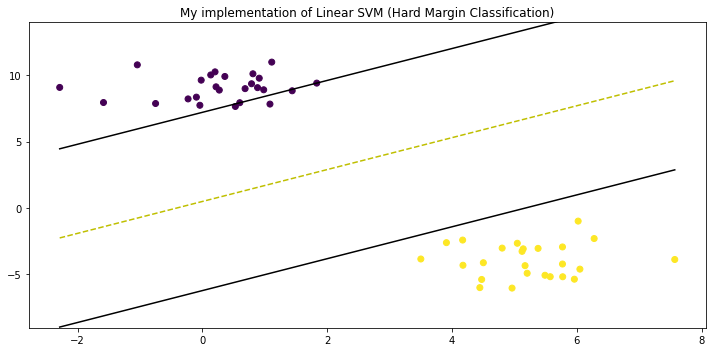

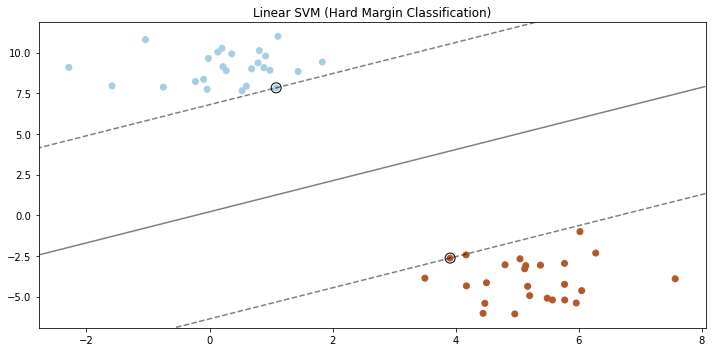

In [36]:
# my implementation visualization
visualize_svm()

# fit the model with hard margin (Large C parameter)
svc = LinearSVC(loss="hinge", C=1000)
svc.fit(X, y)

# sklearn implementation visualization
plot_svm()

## Pros

* Very good Linear classifier because it finds the best decision boundary (In a Hard Margin Classification sense)
* Easy to transform into a non-linear model

## Cons

* Not suited for large datasets

## Wrap Up
Thank you for taking the time to read through this story (as it's called on Medium). You now have a good conceptual understanding of Support Vector Machines, what happens under the hood of a SVM and how to code a hard margin classifier in Python.
